In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
save_model_path = 'models/savedkeypoints.h5'
tflite_model_path = 'models/savedkeypointclassifies.tflite'


In [3]:
num_classes = 3

Data Preprocessing

In [4]:
dataframe = pd.read_csv("keypoints.csv", header=None)
x = dataframe.iloc[:,1:43].values
y = dataframe.iloc[:,0].values

In [5]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
x_scaled =sc.fit_transform(x)

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.2,random_state=0)

Building NN

In [7]:
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [8]:
classifier = Sequential()

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2022-11-26 11:39:42.800379: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-11-26 11:39:42.800872: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [15]:
classifier.add(Dense(42,activation='relu',input_shape =(42,)))
classifier.add(Dense(50, activation='relu'))
classifier.add(Dense(num_classes,activation='softmax'))


In [16]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 42)                1806      
                                                                 
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense_1 (Dense)             (None, 50)                2150      
                                                                 
 dense_2 (Dense)             (None, 3)                 153       
                                                                 
 dense_3 (Dense)             (None, 42)                168       
                                                                 
 dense_4 (Dense)             (None, 50)                2150      
                                                                 
 dense_5 (Dense)             (None, 3)                 1

In [17]:
from keras.callbacks import ModelCheckpoint,EarlyStopping

In [18]:
cp_callback = ModelCheckpoint(save_model_path,verbose=1,save_weights_only=False)
es_callback =EarlyStopping(patience=20, verbose = 1)

In [19]:
classifier.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [20]:
classifier.fit(x_train,y_train,epochs=50, batch_size=32,callbacks=[cp_callback,es_callback],validation_data=(x_test,y_test))

Epoch 1/50


2022-11-26 11:40:43.451060: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - ETA: 0s - loss: 1.0944 - accuracy: 0.3311
Epoch 1: saving model to models/savedkeypoints.h5
5/5 [==============================] - 1s 72ms/step - loss: 1.0944 - accuracy: 0.3311 - val_loss: 1.0366 - val_accuracy: 0.7105
Epoch 2/50
1/5 [=====>........................] - ETA: 0s - loss: 1.0564 - accuracy: 0.5938

2022-11-26 11:40:43.881127: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.



Epoch 2: saving model to models/savedkeypoints.h5
5/5 [==============================] - 0s 21ms/step - loss: 1.0308 - accuracy: 0.5946 - val_loss: 0.9769 - val_accuracy: 0.7105
Epoch 3/50
1/5 [=====>........................] - ETA: 0s - loss: 0.9887 - accuracy: 0.5938
Epoch 3: saving model to models/savedkeypoints.h5
5/5 [==============================] - 0s 20ms/step - loss: 0.9737 - accuracy: 0.8649 - val_loss: 0.9220 - val_accuracy: 1.0000
Epoch 4/50
1/5 [=====>........................] - ETA: 0s - loss: 0.9280 - accuracy: 0.9688
Epoch 4: saving model to models/savedkeypoints.h5
5/5 [==============================] - 0s 28ms/step - loss: 0.9247 - accuracy: 0.9797 - val_loss: 0.8747 - val_accuracy: 1.0000
Epoch 5/50
1/5 [=====>........................] - ETA: 0s - loss: 0.8867 - accuracy: 0.9688
Epoch 5: saving model to models/savedkeypoints.h5
5/5 [==============================] - 0s 26ms/step - loss: 0.8658 - accuracy: 0.9932 - val_loss: 0.8217 - val_accuracy: 1.0000
Epoch 6/50


In [18]:
classifier.evaluate(x_test,y_test)

2/2 [==============================] - 0s 5ms/step - loss: 0.1205 - accuracy: 1.0000


[0.12047038972377777, 1.0]

In [21]:
from keras.models import load_model

model = load_model(save_model_path)

In [22]:
#making predictions
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis =-1)

2/2 [==============================] - 0s 17ms/step


2022-11-26 11:40:55.632675: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [23]:
model.save(save_model_path)

In [24]:
from sklearn.metrics import confusion_matrix,classification_report
import itertools

Confusion matrix, without normalization
[[13  0  0]
 [ 0 11  0]
 [ 0  0 14]]


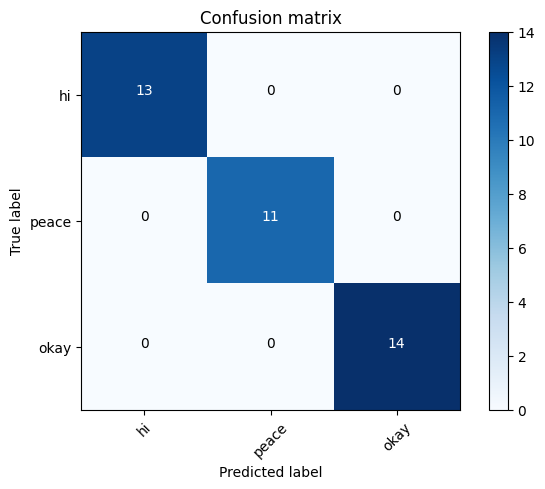

In [25]:
cm = confusion_matrix(y_test,y_pred)

def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
class_name = ['hi','peace', 'okay']
plot_confusion_matrix(cm,classes = class_name)

In [26]:
cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        14

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



Converting model to tflite

In [27]:
import tensorflow as tf

In [28]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()
open(tflite_model_path, "wb").write(tflite_model)

INFO:tensorflow:Assets written to: /var/folders/2n/zdf95zpn6m30n4ykvp3gm_f00000gn/T/tmp0yv82s7z/assets


2022-11-26 11:41:13.858366: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:362] Ignored output_format.
2022-11-26 11:41:13.858380: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:365] Ignored drop_control_dependency.
2022-11-26 11:41:13.858874: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /var/folders/2n/zdf95zpn6m30n4ykvp3gm_f00000gn/T/tmp0yv82s7z
2022-11-26 11:41:13.860084: I tensorflow/cc/saved_model/reader.cc:89] Reading meta graph with tags { serve }
2022-11-26 11:41:13.860090: I tensorflow/cc/saved_model/reader.cc:130] Reading SavedModel debug info (if present) from: /var/folders/2n/zdf95zpn6m30n4ykvp3gm_f00000gn/T/tmp0yv82s7z
2022-11-26 11:41:13.864913: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:354] MLIR V1 optimization pass is not enabled
2022-11-26 11:41:13.866147: I tensorflow/cc/saved_model/loader.cc:229] Restoring SavedModel bundle.
2022-11-26 11:41:13.915102: I tensorflow/cc/saved_model/loader.

12032

Inference Test

In [29]:
interpreter = tf.lite.Interpreter(model_path = tflite_model_path)
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
interpreter.set_tensor(input_details[0]['index'],np.array([x_test[0]], dtype = np.float32))


In [30]:
interpreter.invoke()
result = interpreter.get_tensor(output_details[0]['index'])
print(result)

[[0.00259734 0.9952251  0.00217753]]


In [31]:
print(tf.__version__)

2.10.0
